# Contents

    
1. Primary Finding
    
2. Overview

3. Analyzing Distribution of Various Crimes<br>

4. Crime Distribution by Location<br>

5. Changes in Crime Patterns by Time<br>


# Primary Finding

The following are the primary findings - 
1. High rate of crimes in districts R and S
2. Car prowl is the most common crime in Seattle and mostly takes place in sectors M and K

# Overview

Firstly the datasets are summarized and different attributes are studied.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
data1 = pd.read_csv('seattle_incidents_summer_2014.csv')
data2 = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

/home/ishaan/ishaan/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
data1.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [6]:
data1.describe()

,RMS CDW ID,General Offense Number,Offense Code Extension,Census Tract 2000,Longitude,Latitude,Month,Year
count,3.277900e+04,3.277900e+04,32779.000000,32645.000000,32779.000000,32779.000000,32779.000000,32779.0
mean,5.786503e+05,2.019999e+09,4.199793,6737.664956,-114.680394,44.646274,6.980933,2014.0
std,4.876735e+05,1.111669e+09,12.028941,3300.797625,29.620933,11.531858,0.812021,0.0
min,1.247000e+04,2.015135e+07,0.000000,100.100100,-122.425315,0.000000,6.000000,2014.0
25%,4.724550e+04,2.014207e+09,0.000000,4600.100000,-122.346076,47.580045,6.000000,2014.0
50%,9.998590e+05,2.014243e+09,0.000000,7500.400700,-122.328713,47.614196,7.000000,2014.0
75%,1.030116e+06,2.014277e+09,1.000000,9200.201300,-122.307333,47.664051,8.000000,2014.0
max,1.125252e+06,2.014142e+11,98.000000,26500.100200,0.000000,47.749606,8.000000,2014.0


Following are the counts of null values in each column -

In [7]:
data1.isna().sum()

RMS CDW ID                               0
General Offense Number                   0
Offense Code                             0
Offense Code Extension                   0
Offense Type                             0
Summary Offense Code                     0
Summarized Offense Description           0
Date Reported                            0
Occurred Date or Date Range Start        0
Occurred Date Range End              16280
Hundred Block Location                   0
District/Sector                         57
Zone/Beat                               56
Census Tract 2000                      134
Longitude                                0
Latitude                                 0
Location                                 0
Month                                    0
Year                                     0
dtype: int64

In [8]:
data2.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [9]:
data2.describe()

,IncidntNum,X,Y,PdId
count,2.899300e+04,28993.000000,28993.000000,2.899300e+04
mean,1.420173e+08,-122.421961,37.768911,1.420173e+13
std,1.853367e+07,0.025313,0.023604,1.853367e+12
min,1.028438e+07,-122.513642,37.708083,1.028439e+12
25%,1.405456e+08,-122.432224,37.756486,1.405456e+13
50%,1.406320e+08,-122.415633,37.775421,1.406320e+13
75%,1.407197e+08,-122.406521,37.785094,1.407197e+13
max,9.903674e+08,-122.365565,37.817315,9.903674e+13


# Analyzing different crimes

As a first step, we can find the crimes that are the most common in Seattle using a bar plot.

In [10]:
temp = pd.DataFrame(data1['Summarized Offense Description'].value_counts())
temp.reset_index(inplace=True)
temp.columns=['Offense','Count']
temp.head()

,Offense,Count
0,CAR PROWL,6230
1,OTHER PROPERTY,3755
2,BURGLARY,3212
3,VEHICLE THEFT,3057
4,PROPERTY DAMAGE,2365


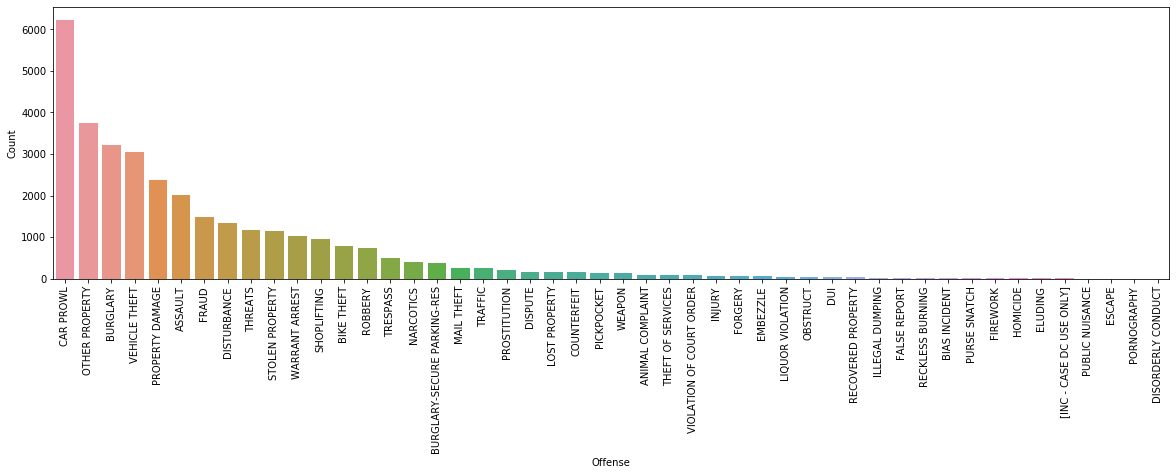

In [11]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
fig = sns.barplot(x='Offense',y='Count',data=temp)


It can be seen that the cases of car prowl are nearly double as compared to the next most common crime.

# Crime Distribution by Location

We are given the approx longitude and latitude corresponding to each crime. Along with the district information we can use this to find areas where crime is high in Seattle.

In [12]:
crimes = list(temp['Offense'].head(16))


In [13]:
temp = data1.loc[data1['Summarized Offense Description'].isin(crimes)]
xyrange = pd.Series(np.sort(np.linspace(1,10,len(temp))))
temp = temp.sort_values('Longitude').reset_index(drop=True,inplace=False)
temp['x'] = xyrange
temp = temp.sort_values('Latitude').reset_index(drop=True,inplace=False)
temp['y'] = xyrange


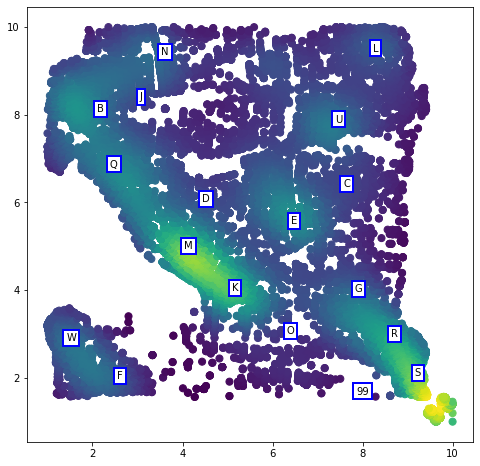

In [14]:
centres = temp.groupby('District/Sector')[['x','y']].median()
cx = list(centres['x'])
cy = list(centres['y'])
districts =  list(centres.index)
xarray = np.array(temp['x'])
yarray = np.array(temp['y'])
xy = np.vstack([xarray,yarray])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(figsize=(8,8))
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2)
ax.scatter(xarray,yarray,c=z,s=50)
for i,label in enumerate(districts):
    ax.text(cx[i],cy[i],label,bbox=bbox_props)

From the above heatmap, we can see that crime is quite high in districts R,S,M and K as compared to others. We can also use scatterplot to find the type of crimes in each of the districts.
For simplicity offenses that are similar to robbery are all considered to be the same. However as a special case, car prowl is considered seperately

In [15]:
drop = ['OTHER PROPERTY','WARRANT ARREST']
temp = temp[temp['Summarized Offense Description'].isin(drop)==False]
def cat(x):
    robberies = ['SHOPLIFTING','VEHICLE THEFT','ROBBERY','BIKE THEFT']
    if(x in robberies):
        return 'ROBBERY'
    else:
        return x
crime = temp['Summarized Offense Description'].apply(lambda x: cat(x))

In [16]:
temp['crime'] = crime

In [17]:
crime.value_counts()

CAR PROWL          6230
ROBBERY            5534
BURGLARY           3212
PROPERTY DAMAGE    2365
ASSAULT            2018
FRAUD              1473
DISTURBANCE        1333
THREATS            1178
STOLEN PROPERTY    1136
TRESPASS            486
NARCOTICS           391
Name: Summarized Offense Description, dtype: int64

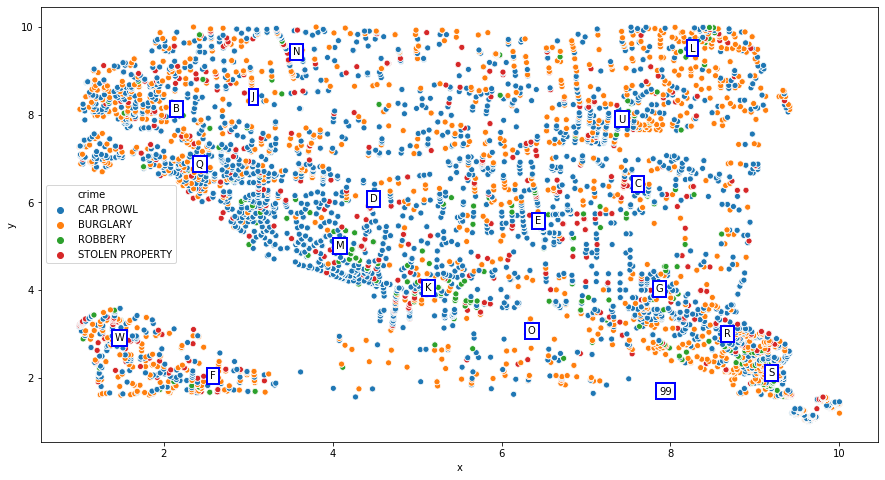

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
a = temp[temp['Summarized Offense Description'].isin(['ROBBERY','BURGLARY','CAR PROWL','STOLEN PROPERTY'])]
sns.scatterplot(a['x'],a['y'],hue=a['crime'])
for i,label in enumerate(districts):
    ax.text(cx[i],cy[i],label,bbox=bbox_props)

From the above we can see that area under district M is largely associated with car prowls. Other crimes are not very frequent. 
For clarity, bar plots can be used to identify the common crime for districts with high number of cases. Hence districts M,K,R,S,B and E are considered based on the above figures

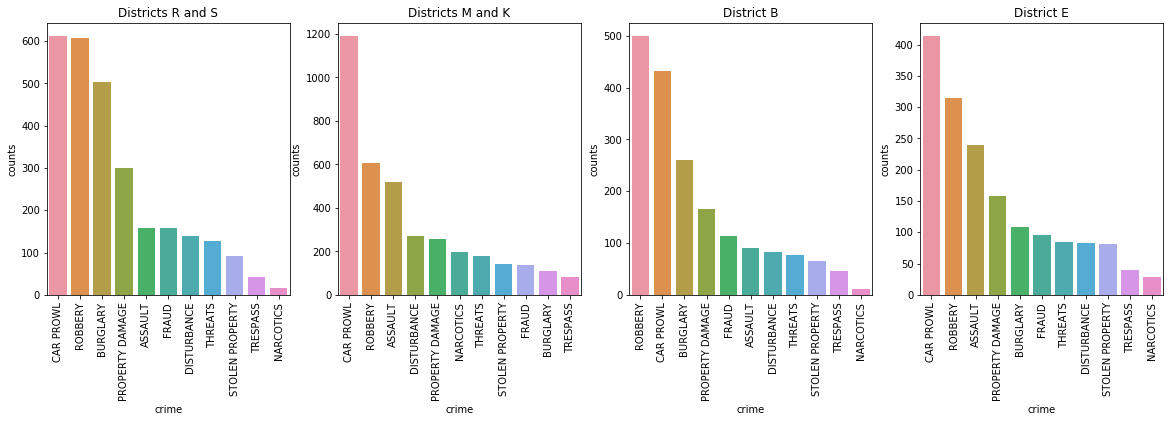

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
disSR = temp[temp['District/Sector'].isin(['S','R'])]
disSR = disSR['crime'].value_counts()
ax1.set_title('Districts R and S')
bar1 = pd.DataFrame({'crime':disSR.index, 'counts':disSR})
bar1plt = sns.barplot('crime','counts',data=bar1,ax = ax1)
bar1plt.set_xticklabels(bar1plt.get_xticklabels(),rotation=90);

disMK = temp[temp['District/Sector'].isin(['M','K'])]
disMK = disMK['crime'].value_counts()
ax2.set_title('Districts M and K')
bar2 = pd.DataFrame({'crime':disMK.index, 'counts':disMK})
bar2plt = sns.barplot('crime','counts',data=bar2,ax = ax2)
bar2plt.set_xticklabels(bar2plt.get_xticklabels(),rotation=90);

disB = temp[temp['District/Sector'].isin(['B'])]
disB = disB['crime'].value_counts()
ax3.set_title('District B')
bar3 = pd.DataFrame({'crime':disB.index, 'counts':disB})
bar3plt = sns.barplot('crime','counts',data=bar3,ax = ax3)
bar3plt.set_xticklabels(bar3plt.get_xticklabels(),rotation=90);


disE = temp[temp['District/Sector'].isin(['E'])]
disE = disE['crime'].value_counts()
ax4.set_title('District E')
bar4 = pd.DataFrame({'crime':disE.index, 'counts':disE})
bar4plt = sns.barplot('crime','counts',data=bar4,ax = ax4)
bar4plt.set_xticklabels(bar4plt.get_xticklabels(),rotation=90);


From the above we can confirm that car prowl is quite common around districts M and K.

# Variation in Crime Based on Time

In [18]:
# dtformat = '%H %M %S'
data1['crime'] = crime

timed = data1.reset_index(drop=False).set_index(pd.DatetimeIndex(pd.to_datetime(data1['Occurred Date or Date Range Start'])))
# pd.to_datetime(data1['Occurred Date or Date Range Start']).dt.time.between_time('08:00:00','10:00:00')

In [68]:
dayindex = timed.between_time('07:00:00','19:00:00')['index']
# nightindex = timed.between_time('19:00:00','07:00:00')['index']

In [73]:
timed['day/night'] = timed.apply(lambda x: 'day' if x['index'] in list(dayindex) else 'night' ,axis=1)

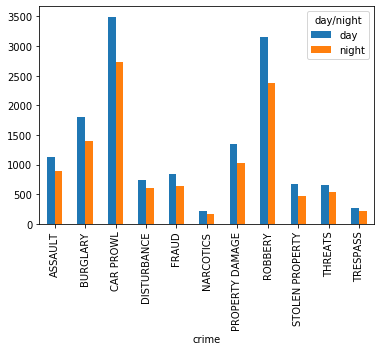

In [84]:
timed.groupby('day/night').crime.value_counts().unstack(0).plot.bar()

In [19]:
timed['Occurred Date or Date Range Start'] = pd.to_datetime(timed['Occurred Date or Date Range Start'])

In [20]:
timed['Date'] = timed['Occurred Date or Date Range Start'].dt.date

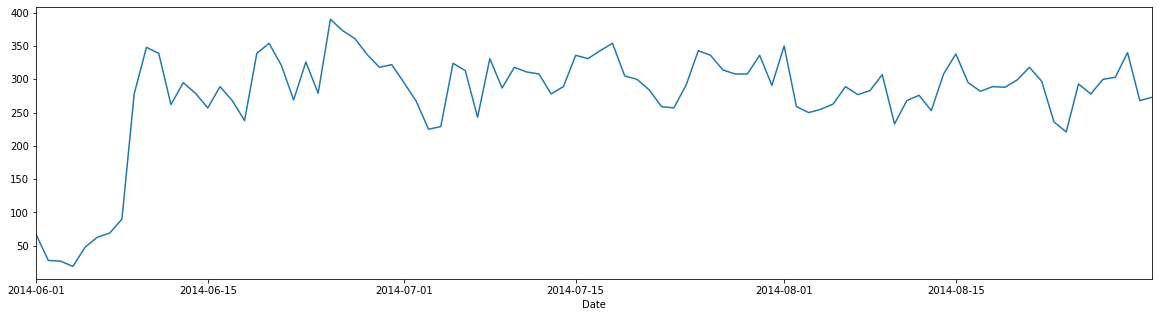

In [26]:
crimecounts = timed.groupby('Date').crime.count()
plt.figure(figsize=(20,5))
crimecounts.plot()